# Credit Card Segmentation

In this notebook, I will develop a customer segmentation to define marketing strategy. The dataset to be used summarizes the usage behaviour of about 9000 active credit card holders during the last six months. The file is at a customers level with 18 behavioural variables.

## Expectations

- Advanced data preparation: Build an 'enriched' customer profile by deriving intelligent KPIs such as:
    - Monthly average purchase and cash advance amount
    - Purchases by type (one-off, installments)
    - Average amount per purchase and cash advance transaction
    - Limit usage (balance to credit limit ratio)
    - Payment to minimum payments ratio etc.
- Advanced reporting: Use the derived KPIs to gain insights on the cusotmers profiles
- Identification of the relationships/affinities between services.
- Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm to reveal the behavioural segments of credit card holders.
- Identify cluster characteristics of the cluster using detailed profiling
- Provide the strategic insights and implementation of strategies for given set of cluster characteristics

## Exploratory Data Analysis (EDA)

### Import Relevant Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
# Loading the data with the read_csv function
cc_data = pd.read_csv('CCdata.csv')

# we will load a preview of the dataset
cc_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [84]:
# Next, we will use the info() function to see the data types of the columns and to observe any null values
# (we can see that CREDIT_LIMIT and MINIMUM_PAYMENTS have some null values because the non-null counts isn't
# equal to the total entries, 8950)
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [85]:
# Next we will use the describe() function to uncover some useful information about numerical columns
# in our dataset. Such useful information include (min, max, mean)

cc_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [86]:
# Next, I will check for the quantity of missing values in each column if any using the isna() function

cc_data.isna().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [87]:
# We will impute the missing values by replacing them with the mean value of the column
cc_data = cc_data.fillna(cc_data.mean())

In [88]:
# Let's confirm if all the missing values have been replaced.
cc_data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [89]:
# For the exploratory data analysis, the CUST_ID column is irrelevant hence we shall drop it.
cc_data.drop(columns = ['CUST_ID'],inplace = True)

# Generating KPIs

### KPI_1: Monthly Average Puchase and Cash Advance amount

The monthly average purchase is calculated by dividing **PURCHASES** by **TENURE.**
The monthly average cash advance amount is calculated by dividing **CASH_ADVANCE** by **TENURE**

In [90]:
cc_data['Monthly_avg_purchase'] = cc_data['PURCHASES']/cc_data['TENURE']
cc_data['Monthly_avg_cash_advance'] = cc_data['CASH_ADVANCE']/cc_data['TENURE']

In [91]:
cc_data['Monthly_avg_purchase']

0         7.950000
1         0.000000
2        64.430833
3       124.916667
4         1.333333
           ...    
8945     48.520000
8946     50.000000
8947     24.066667
8948      0.000000
8949    182.208333
Name: Monthly_avg_purchase, Length: 8950, dtype: float64

In [92]:
cc_data['Monthly_avg_cash_advance']

0         0.000000
1       536.912124
2         0.000000
3        17.149001
4         0.000000
           ...    
8945      0.000000
8946      0.000000
8947      0.000000
8948      6.093130
8949     21.173335
Name: Monthly_avg_cash_advance, Length: 8950, dtype: float64

### KPI_2: Identifying the Purchases behaviour among customers

To learn more about the purchase behaviour of customers, we will explore the data by showing only the **ONEOFF_PURCHASES** and **INSTALLMENTS_PURCHASES** columns and observe it to identify underlying insights.

In [93]:
cc_data.loc[:, ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']].head(15)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


From the above preview of the OneOff Purchases and Installment Purchases, we can observe that some rows have 0.00 Oneoff Purchases and some amount of installment purchases. Others have 0.00 Installment purchases and some amount of oneoff purchases. Other rows have both and others have none. We will further explore the two columns to confirm our observation so far.

In [94]:
cc_data[(cc_data['ONEOFF_PURCHASES']==0) & (cc_data['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 19)

In [95]:
cc_data[(cc_data['ONEOFF_PURCHASES']>0) & (cc_data['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 19)

In [96]:
cc_data[(cc_data['ONEOFF_PURCHASES']>0) & (cc_data['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 19)

In [97]:
cc_data[(cc_data['ONEOFF_PURCHASES']==0) & (cc_data['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 19)

From the above analysis, we can observe that there are four behavioural patterns in purchases among customers.
These behavioural patterns include:
 - customers who do both one_off purchases and installment purchases
 - customers who do only one_off purchases
 - customers who do only installment purchases
 - customers who do none

Moving forward, we are going to create a catergorical variable in the dataset to record each of the behavioural patterns.

In [98]:
def purchaseType(cc_data):
    if (cc_data['ONEOFF_PURCHASES']==0) & (cc_data['INSTALLMENTS_PURCHASES']==0):
        return 'None'
    if (cc_data['ONEOFF_PURCHASES']>0) & (cc_data['INSTALLMENTS_PURCHASES']>0):
        return 'both_oneOff_installment'
    if (cc_data['ONEOFF_PURCHASES']>0) & (cc_data['INSTALLMENTS_PURCHASES']==0):
        return 'oneOff_purchases'
    if (cc_data['ONEOFF_PURCHASES']==0) & (cc_data['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [99]:
cc_data['Purchase_Type'] = cc_data.apply(purchaseType, axis=1)

In [100]:
cc_data['Purchase_Type'].value_counts()

both_oneOff_installment    2774
installment                2260
None                       2042
oneOff_purchases           1874
Name: Purchase_Type, dtype: int64

### KPI_3: Balance to Credit Limit Ratio

Balance to Credit limit ratio which is also called credit utilization ratio measures the balances you owe on your credit cards relative to the credit card limit. A higher ratio means that you may get loans at a higher interest rates or may not be able to get loans at all. A ratio of 0.3 or below is ideal in many cases. In other words, a good credit score means that owing 30% or less of the credit limit.

To calculate the balance to credit limit ratio, we will divide **BALANCE** by **CREDIT_LIMIT**

In [101]:
cc_data['Limit_Usage'] = cc_data['BALANCE']/cc_data['CREDIT_LIMIT']
cc_data['Limit_Usage']

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8945    0.028494
8946    0.019183
8947    0.023399
8948    0.026915
8949    0.310590
Name: Limit_Usage, Length: 8950, dtype: float64

### KPI_4: Payments to minimum payment ratio

Every month customers are required to make minimum payment on their credit card balances. In the cells below, we will calculate the ratio of payments to minimum payments. In other words, we want to know now much customers pay per months as compared to their required minimum payment.

In [102]:
cc_data['Pay_minPay'] = cc_data['PAYMENTS']/cc_data['MINIMUM_PAYMENTS']
cc_data['Pay_minPay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.319208
8947    0.986076
8948    0.942505
8949    0.715439
Name: Pay_minPay, Length: 8950, dtype: float64

### Log Transformation

**We will apply log transformation to reduce or remove skewness in our data**

In [103]:
cc_data_log = cc_data.drop(['Purchase_Type'],axis=1).applymap(lambda x: np.log(x+1))

In [104]:
cc_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_avg_cash_advance,Limit_Usage,Pay_minPay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,86.175173,88.977984,0.388883,9.036121
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,180.508787,193.136115,0.389722,118.176913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.907301
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,31.936667,0.000000,0.302720,2.017230
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,97.228333,99.085196,0.717571,6.049228
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


In [105]:
cc_data_log.describe() # Log transformed dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_avg_cash_advance,Limit_Usage,Pay_minPay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094870,6.624540,5.951599,0.117730,2.519680,3.050877,2.163970,0.296081,1.353976
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819635,1.591763,1.179645,0.211617,0.130367,2.002823,2.429741,0.250303,0.940928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.645689
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.818979,0.000000,2.564949,3.494587,0.000000,0.264455,1.104339
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.762968,0.133531,2.564949,4.587295,4.606022,0.540911,1.952918
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


### Insights from KPIs

**Average payment to minimum payment ratio for each purchase type**

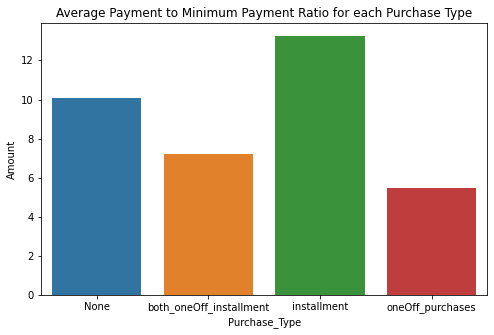

In [113]:
pt = cc_data.groupby('Purchase_Type').apply(lambda x: np.mean(x['Pay_minPay']))
pt = pt.to_frame()
pt = pt.rename(columns={0: "Amount"})
plt.figure(figsize=(8,5))
sns.barplot(y='Amount', x=pt.index, data=pt).set(title='Average Payment to Minimum Payment Ratio for each Purchase Type')
plt.savefig('pay_minPay.jpg')

From the above graph, we can observe that customers who make installment purchases have the highest payment to minimum payment ratio. This means that they are far less likely to default on their credit cards. This is because they are almost always able to keep a good credit score. Customers who make oneoff purchases have the lowest payment to minimum payment ratio. This means that they are more likely to default on their credit cards than other purchase type behaviours.

**Average Balance to Limit Ratio per Purchase Type**

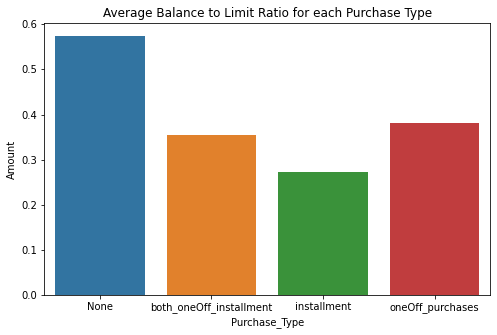

In [114]:
usage = cc_data.groupby('Purchase_Type').apply(lambda x: np.mean(x['Limit_Usage']))
usage = usage.to_frame()
usage = usage.rename(columns={0: "Amount"})
plt.figure(figsize=(8,5))
sns.barplot(y='Amount', x=usage.index, data=usage).set(title='Average Balance to Limit Ratio for each Purchase Type')
plt.savefig('bal_lim_ratio.jpg')

Balance to limit ratio of 0.3 or below denotes a good credit score. From the graph, we can see that customers who make installment purchases have the best credit scores. This is because they have a high payment to minimum payment ratio and thus are the least likely to default on their credit cards. Those who do none of oneoff or installment purchases have the worst credit scores. They usually take a lot of cash advance amount and thus are the most likely to default on their credit cards.

**Average Monthly Cash Advance per Purchase Type**

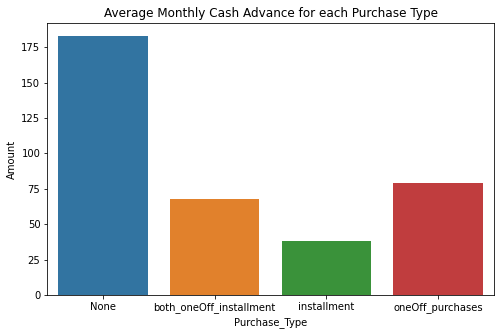

In [115]:
cash = cc_data.groupby('Purchase_Type').apply(lambda x: np.mean(x['Monthly_avg_cash_advance']))
cash = cash.to_frame()
cash = cash.rename(columns={0: "Amount"})
plt.figure(figsize=(8,5))
sns.barplot(y='Amount', x=cash.index, data=cash).set(title='Average Monthly Cash Advance for each Purchase Type')
plt.savefig('cash_advance.jpg')

From the above graph, we can see that customers who make none of oneoff or installment purchases have the highest average monthly cash advance amount. These group of customers as seen in the previous graphs, are the most likely to default on their credit card.

**Average Monthly Average Purchase for each Purchase Type**

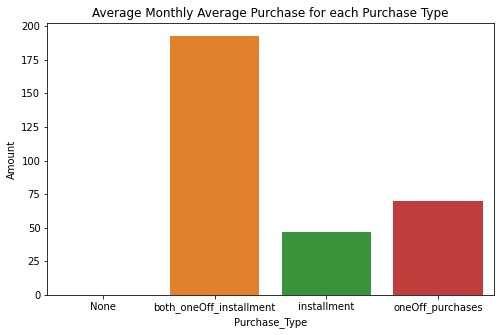

In [116]:
purchase = cc_data.groupby('Purchase_Type').apply(lambda x: np.mean(x['Monthly_avg_purchase']))
purchase = purchase.to_frame()
purchase = purchase.rename(columns={0: "Amount"})
plt.figure(figsize=(8,5))
sns.barplot(y='Amount', x=purchase.index, data=purchase).set(title='Average Monthly Average Purchase for each Purchase Type')
plt.savefig('avg_purchase.jpg')

From the above graph, we can see that the group of customers who make both oneoff and installment purchases are those that have the highest monthly average purchases. This makes sense because they make two types of purchases. 

### Creating Dummy Variables on the Purchase Type Column

In preparing for machine learning, we have to ensure that all our features are numerical. For categorical features, we have to encode them. In this example, since the categorical variable is only one, I decided to create a dummy variables for that column.

In [29]:
cc_data_dummy = pd.concat([cc_data_log, pd.get_dummies(cc_data['Purchase_Type'])],axis=1)
cc_data_dummy.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_avg_cash_advance',
       'Limit_Usage', 'Pay_minPay', 'None', 'both_oneOff_installment',
       'installment', 'oneOff_purchases'],
      dtype='object')

In [30]:
## I will drop the following variables since they were used to derive the KPIs.
cc_data_dummy.drop(['TENURE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','BALANCE',
                   'PURCHASES','CASH_ADVANCE'],axis=1,inplace=True)

<AxesSubplot:>

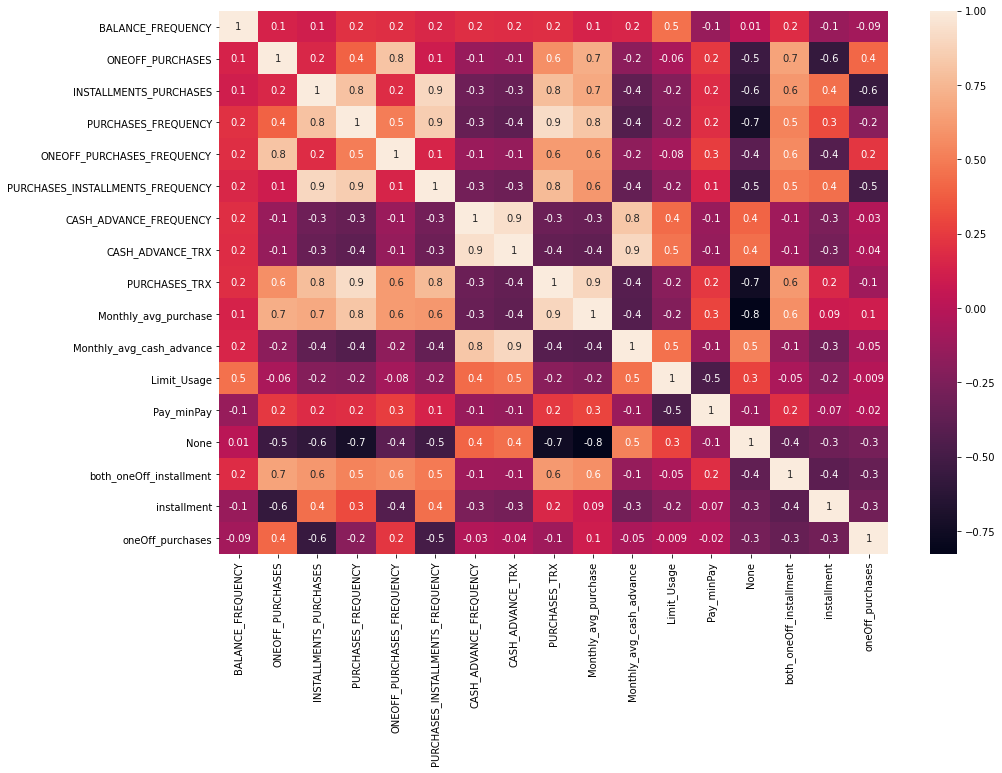

In [31]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(cc_data_dummy.corr(), annot = True, fmt='.1g')

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensinality reduction techique used to reduce the number of features in a dataset. In our case, we can see from the heat map that some of the variables or features are correlated. For this reason some features may be redundant leading to a situation where we are using more data than we actually need in order to reach the same goal. More features also cause high computational overhead. For this reason, we will use PCA to reduce to the number of features and also to reduce the computational overhead.

### Standadization of Data

Before we can apply PCA, we have to standardize our data to avoid the effects of scale. This also ensures that the same weight is applied to all the features.

In [32]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
cc_data_scaled = scaler.fit_transform(cc_data_dummy)

In [33]:
cc_data_scaled

array([[-0.14875746, -0.98708958,  0.39447984, ..., -0.67019253,
         1.72051649, -0.514625  ],
       [ 0.17961568, -0.98708958, -1.08745376, ..., -0.67019253,
        -0.58122082, -0.514625  ],
       [ 0.49271003,  1.06202168, -1.08745376, ..., -0.67019253,
        -0.58122082,  1.94316249],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ..., -0.67019253,
         1.72051649, -0.514625  ],
       [-0.09290575, -0.98708958, -1.08745376, ..., -0.67019253,
        -0.58122082, -0.514625  ],
       [-0.73437135,  1.16861854, -1.08745376, ..., -0.67019253,
        -0.58122082,  1.94316249]])

### Application of PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
variance = {}
for n in range(4,17):
    pca = PCA(n_components=n)
    pca_fit = pca.fit(cc_data_scaled)
    variance[n] = sum(pca_fit.explained_variance_ratio_)

In [36]:
variance

{4: 0.8111335992350033,
 5: 0.8765582531985503,
 6: 0.9186927883289483,
 7: 0.9411494237387049,
 8: 0.9616131493046627,
 9: 0.9739809893129765,
 10: 0.983584472391696,
 11: 0.9897244591771952,
 12: 0.9927552874772531,
 13: 0.9953908392341269,
 14: 0.9979616763385536,
 15: 0.9996360470426321,
 16: 0.9999999999999998}

<AxesSubplot:>

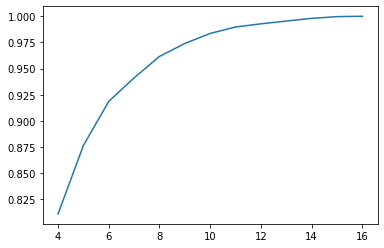

In [37]:
# A graphical plot showing the number of components and how must variance they explain.
pd.Series(variance).plot()

**Since 6 components explains over 90% of the variance, we will go with 6 components**

In [38]:
final_pca = PCA(n_components=6).fit(cc_data_scaled)

final_data = final_pca.fit_transform(cc_data_scaled)

In [39]:
final_data.shape

(8950, 6)

In [40]:
pca_data = pd.DataFrame(final_data)
pca_data

,0,1,2,3,4,5
0,-0.242944,-2.760785,0.351361,-0.401614,-0.005484,0.007605
1,-3.975266,0.148735,-0.547959,1.028855,-0.418437,-0.568251
2,1.288318,1.507531,2.716051,-1.880704,-0.005185,-0.591734
3,-1.047033,0.670834,2.508175,-1.306821,0.753048,1.399861
4,-1.451302,-0.173798,2.291291,-1.606464,-0.577955,-0.699099
...,...,...,...,...,...,...
8945,1.778988,-2.617067,-0.733263,-0.070225,0.621837,-1.224327
8946,1.569316,-2.672683,-0.973680,-1.158436,0.219114,-0.147240
8947,1.156493,-2.803228,-0.526568,-0.672905,0.323519,-0.000867
8948,-3.249700,-1.014316,0.475842,0.838333,-1.110699,-0.027429


In [41]:
pca_data.shape

(8950, 6)

In [42]:
# This line of code shows what percentage of variance each component has.
pd.Series(final_pca.explained_variance_ratio_,index=['PCA_' + str(i) for i in range(6)])

PCA_0    0.402034
PCA_1    0.180612
PCA_2    0.147189
PCA_3    0.081299
PCA_4    0.065425
PCA_5    0.042135
dtype: float64

In [43]:
cols = cc_data_dummy.columns

In [44]:
pd.DataFrame(final_pca.components_.T, columns=['PC_'+str(i) for i in range(6)], index=cols)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.030022,0.239460,-0.262472,-0.349273,-0.232518,-0.693531
ONEOFF_PURCHASES,0.214170,0.406202,0.238641,0.001183,-0.023161,0.128678
INSTALLMENTS_PURCHASES,0.312078,-0.098990,-0.315587,0.086934,-0.001464,0.114002
PURCHASES_FREQUENCY,0.345861,0.015281,-0.162680,-0.076637,0.114846,-0.078558
ONEOFF_PURCHASES_FREQUENCY,0.214778,0.362314,0.162690,0.036747,-0.050722,-0.091641
PURCHASES_INSTALLMENTS_FREQUENCY,0.295470,-0.112655,-0.329909,0.021816,0.025601,0.008325
CASH_ADVANCE_FREQUENCY,-0.214255,0.285960,-0.279823,0.090296,0.360688,0.068781
CASH_ADVANCE_TRX,-0.229307,0.291441,-0.286339,0.097661,0.333356,0.084039
PURCHASES_TRX,0.355560,0.106184,-0.102734,-0.056154,0.104178,-0.007888
Monthly_avg_purchase,0.346029,0.141399,0.023945,-0.081779,0.193225,0.015556


# Clustering

## KMeans Clustering

KMeans clustering is an iterative algorithm that aims at partitioning a dataset into a predefined number of clusters such that each row in the dataset belongs to only one group. KMeans tries to make the intra cluster data points as similar as possible and make the inter cluster data points as disimilar as possible. It assigns a data point to a cluster such that the sum of squared distance between the data point and its centroid is at the minimum. The less variation within a cluster, the more homogeneous the data points are within the cluster.

For this part of the project, I will use the **Elbow Method** for optimal k, and the performance metrics of KMeans (Calinski harabaz and Silhouette score) to find the number of clusters that are able to show unique characteristics of each cluster.

**The Elbow Method**

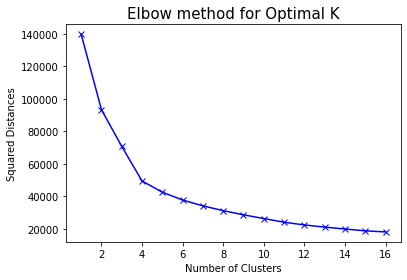

In [45]:
from sklearn.cluster import KMeans
squared_distance = []
for k in range(1,len(cols)):
    km = KMeans(n_clusters=k)
    km = km.fit(final_data)
    squared_distance.append(km.inertia_)
    
plt.plot(range(1,len(cols)),squared_distance, 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Squared Distances")
plt.title("Elbow method for Optimal K",size=15)
plt.savefig('elbow_k.jpg')
plt.show()

From the graph above, we can see that at 4, the gradient of the line reduces meaning that 4 is the optimal k. In other words, the optimal number of clusters to be used will be 4.

**KMeans Performance Metrics**


From the sklearn.metrics, we will import the **calinski_harabasz_score** and the **silhouette_score** to validate the performance of our clustering.

In [46]:
from sklearn.metrics import calinski_harabasz_score,silhouette_score

In [47]:
cal_score = {}
sil_score = {}
for i in range(2,len(cols)):
    kmeans = KMeans(n_clusters = i)
    kmeans = kmeans.fit(final_data)
    cal_score[i] = calinski_harabasz_score(final_data, kmeans.labels_)
    sil_score[i] = silhouette_score(final_data, kmeans.labels_)
    


**The calinski_harabasz_score**

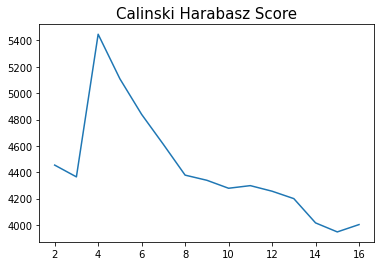

In [48]:
pd.Series(cal_score).plot()
# The plot below shows that KMeans with 4 clusters is able to show unique characteristics of each cluster
plt.title('Calinski Harabasz Score',size=15)
plt.savefig('calinski_harabasz_score.jpg')

**The silhouette_score**

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "size" which is no longer supported as of 3.3 and will become an error two minor releases later
  after removing the cwd from sys.path.


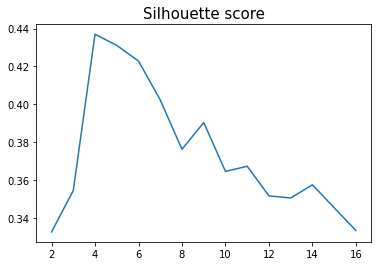

In [49]:
# The plot below also shows that KMeans with 4 clusters is able to show unique characteristics of each cluster
pd.Series(sil_score).plot()
plt.title('Silhouette score',size=15)
plt.savefig('silhouette_score.jpg', size=15)

## Application of KMeans

In [50]:
km = KMeans(n_clusters=4)
km = km.fit(final_data)
km.labels_

array([2, 1, 3, ..., 2, 1, 3], dtype=int32)

In [119]:
pd.Series(km.labels_).value_counts()

0    2769
2    2224
1    2088
3    1869
dtype: int64

In [118]:
for i in list(pd.Series(km.labels_).value_counts()):
    print(i/cc_data.shape[0])

0.3093854748603352
0.24849162011173184
0.23329608938547486
0.2088268156424581


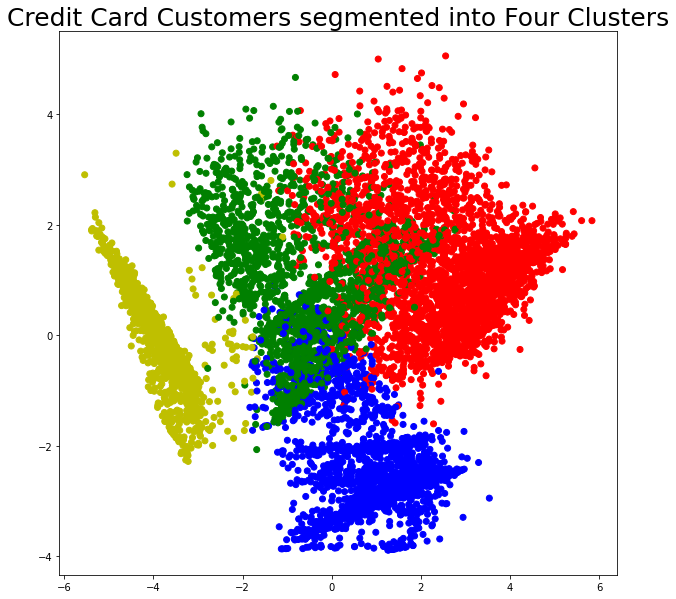

In [52]:
map_color = {0:'r', 1:'y',2:'b',3:'g'}
color_label = [map_color[l] for l in km.labels_]
plt.figure(figsize=(10,10))
plt.scatter(final_data[:,0], final_data[:,1], c=color_label, )
plt.title('Credit Card Customers segmented into Four Clusters', size=25)
plt.savefig('clustering.jpg')

### KPI Selection for Customer Segmentation

In [53]:
# I will select KPI variables for further analysis with the clusters
kpi_cols = ['Monthly_avg_purchase',
       'Monthly_avg_cash_advance', 'Limit_Usage', 'Pay_minPay', 'None',
       'both_oneOff_installment', 'installment', 'oneOff_purchases']

In [54]:
## Here we add the cluster labels to the dataset, cc_data_dummy
df_cluster_4 = pd.concat([cc_data_dummy[kpi_cols], pd.Series(km.labels_,name="Cluster")],axis=1 )

In [55]:
df_cluster_4.head()

,Monthly_avg_purchase,Monthly_avg_cash_advance,Limit_Usage,Pay_minPay,None,both_oneOff_installment,installment,oneOff_purchases,Cluster
0,2.191654,0.000000,0.040086,0.894662,0,0,1,0,2
1,0.000000,6.287695,0.376719,1.574068,1,0,0,0,1
2,4.180994,0.000000,0.287197,0.688979,0,0,0,1,3
3,4.835620,2.898616,0.200671,0.000000,0,0,0,1,3
4,0.847298,0.000000,0.519644,1.327360,0,0,0,1,3


In [56]:
## Using the groupby(), we group the dataset by Cluster on the mean of all the columns.
## This way, we are able to view the mean of each column per cluster.
cluster_mean = df_cluster_4.groupby('Cluster').apply(lambda x: x[kpi_cols].mean())

In [57]:
cluster_mean

,Monthly_avg_purchase,Monthly_avg_cash_advance,Limit_Usage,Pay_minPay,None,both_oneOff_installment,installment,oneOff_purchases
Cluster,,,,,,,,
0,4.769610,1.636466,0.277126,1.631856,0.000000,1.000000,0.000000,0.000000
1,0.037554,4.490651,0.429140,1.135342,0.977969,0.001916,0.017241,0.002874
2,3.384036,0.856574,0.199084,1.245938,0.000000,0.000000,1.000000,0.000000
3,3.474472,1.901905,0.290933,1.315099,0.000000,0.000535,0.000000,0.999465


**From here, we will do the following:**
 - we will take all the KPIs and its values and merge them into a dataframe
 - we will melt the dataset using the melt() function to make it appropriate for visualization
 - From there, we will go on to visualize these KPIs, across all the four clusters.

In [58]:

monthly_avg_purchase = cluster_mean.loc[:,'Monthly_avg_purchase'].values
monthly_cash_advance = cluster_mean.loc[:,'Monthly_avg_cash_advance'].values
credit_score = cluster_mean.loc[:,'Limit_Usage'].values
payment = cluster_mean.loc[:,'Pay_minPay'].values
none_of_install_oneOff_purchases = cluster_mean.loc[:,'None'].values
both_oneOff_installment = cluster_mean.loc[:,'both_oneOff_installment'].values
installment = cluster_mean.loc[:,'installment'].values
oneOff_purchases = cluster_mean.loc[:,'oneOff_purchases'].values



In [59]:
def melt_dataframe(to_melt):
    to_dict = {'Monthly_avg_purchase': monthly_avg_purchase,
              'Monthly_avg_cash_advance':monthly_cash_advance,
              'credit_score':credit_score,
              'Pay_minPay':payment,
              'none_of_install_oneOff_purchases':none_of_install_oneOff_purchases,
              'both_oneOff_installment':both_oneOff_installment,
              'installment':installment,
              'oneOff_purchases':oneOff_purchases,
              'Cluster':to_melt.index}
    to_plot = pd.DataFrame(to_dict)
    melt_plot = pd.melt(to_plot, id_vars=['Cluster'], value_vars=['Monthly_avg_purchase', 'Monthly_avg_cash_advance', 'credit_score',
       'Pay_minPay', 'none_of_install_oneOff_purchases',
       'both_oneOff_installment', 'installment', 'oneOff_purchases'], 
         var_name='KPIs', value_name='KPI_values')
    return melt_plot
    
to_melt1 = melt_dataframe(cluster_mean)

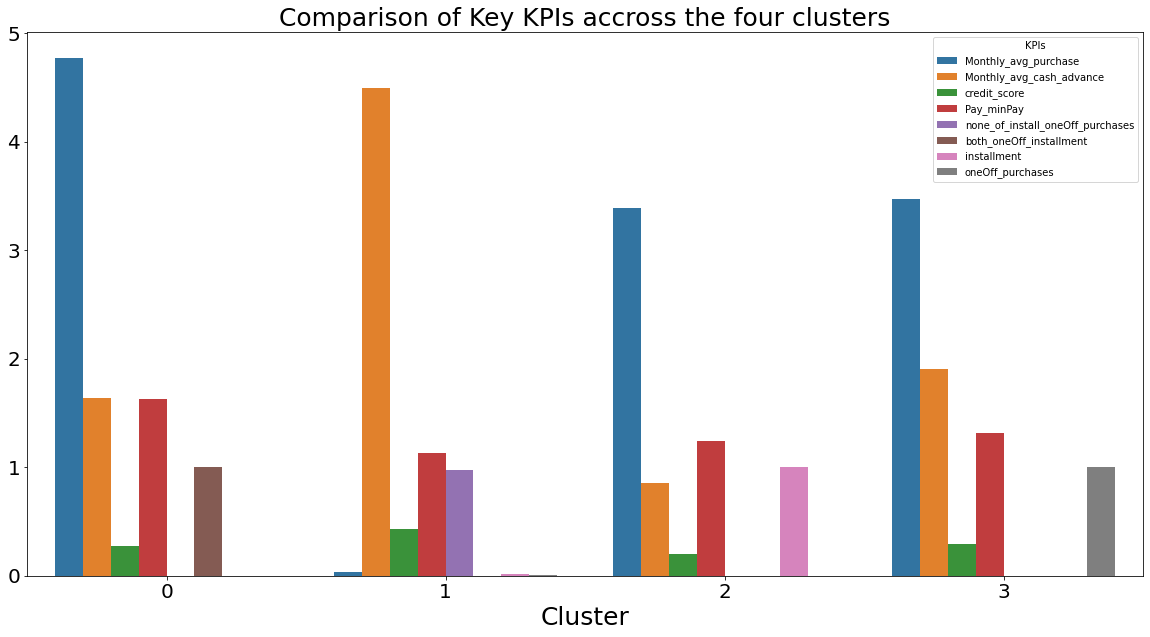

In [60]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='Cluster', y='KPI_values', hue='KPIs', data=to_melt1, ax=ax)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Comparison of Key KPIs accross the four clusters', size=25)
plt.ylabel('')
plt.xlabel('Cluster', size=25)
plt.savefig('kpi_clusters_kmeans.jpg')

## Insights 

From the above graph, we can note the following:

 - **Customer Segment 1 (Cluster 0)** - This segment has the highest Monthly average purchases and the higghest of both of oneoff and installment purchases. They make only both type of purchases (installment and oneoff). This segment also has the highest payment over minimum payment. This means that this segment pays more than the minimum payment required for a credit card than any other customer segment.
 
 - **Customer Segment 2 (Cluster 1)** - This segment has the highest average cash advance amount. It also has the worst credit score among the rest of the segments. It makes the lowest monthly average purchases.
 
 - **Customer Segment 3 (Cluster 2)** - This segement has the second highest monthly average purchaes. They also have second highest payment over minimum payment. They also have the second worst credit score. They make only oneoff purchases.
 
 - **Customer Segment 4 (Cluster 3)** - This segment has the best credit score. They make the lowest monthly average cash advance amount. They make only installment purchases. They have a a relatively better payment over minimum payment ratio as compared to customer segment 2 (Cluster 1).


## Recommendations for Marketing Strategy

 - **Customer Segment 1**
     - This segment are making the purchaes and making the payment as well. They also maintain a comparatively ok credit score. Therefore, they are potential customers. Their credit limit may be increased or interest rates lowered. They can also be given incentives like loyalty or premium cards to encourage more transactions.
     
 - **Customer Segment 2**
     - This segment of customers are likely to default on their payment because of bad credit scores and lowest payment over minimum payment ratio. The company can target them by reducing interest rates on purchase transaction.
     
 - **Customer Segment 3**
     - This segment of customers make only oneoff purchases (eg. payment of utility bills). As their credit score is the second worst and has the second highest monthly cash advance amount, they are also likely to default on their payment. 
     
 - **Customer Segment 4**
     - This segment of customers are the best performing among the rest. They have the best credit score and their payment over minimum payment is relatively good. This segment can be targeted by giving them more rewards to encourage purchase transactions.

# Agglomerative Clustering

Agglomerative Clustering is a type of hierachical clustering algorithm that groups similar objects into clusters. For Agglomerative clustering, it utilizes the bottom up approach where it starts with many small clusters and merge them together to form bigger clusters.

In [61]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Exploring various Linkage Methods of Agglomerative Clustering

The linkage criteria explores how the distance between clusters is calculated. We will try four linkages criteria and choose the one that gives the best results based on our data.

**Single Linkage**

The distance between clusters is the shortest distance between two points in each cluster

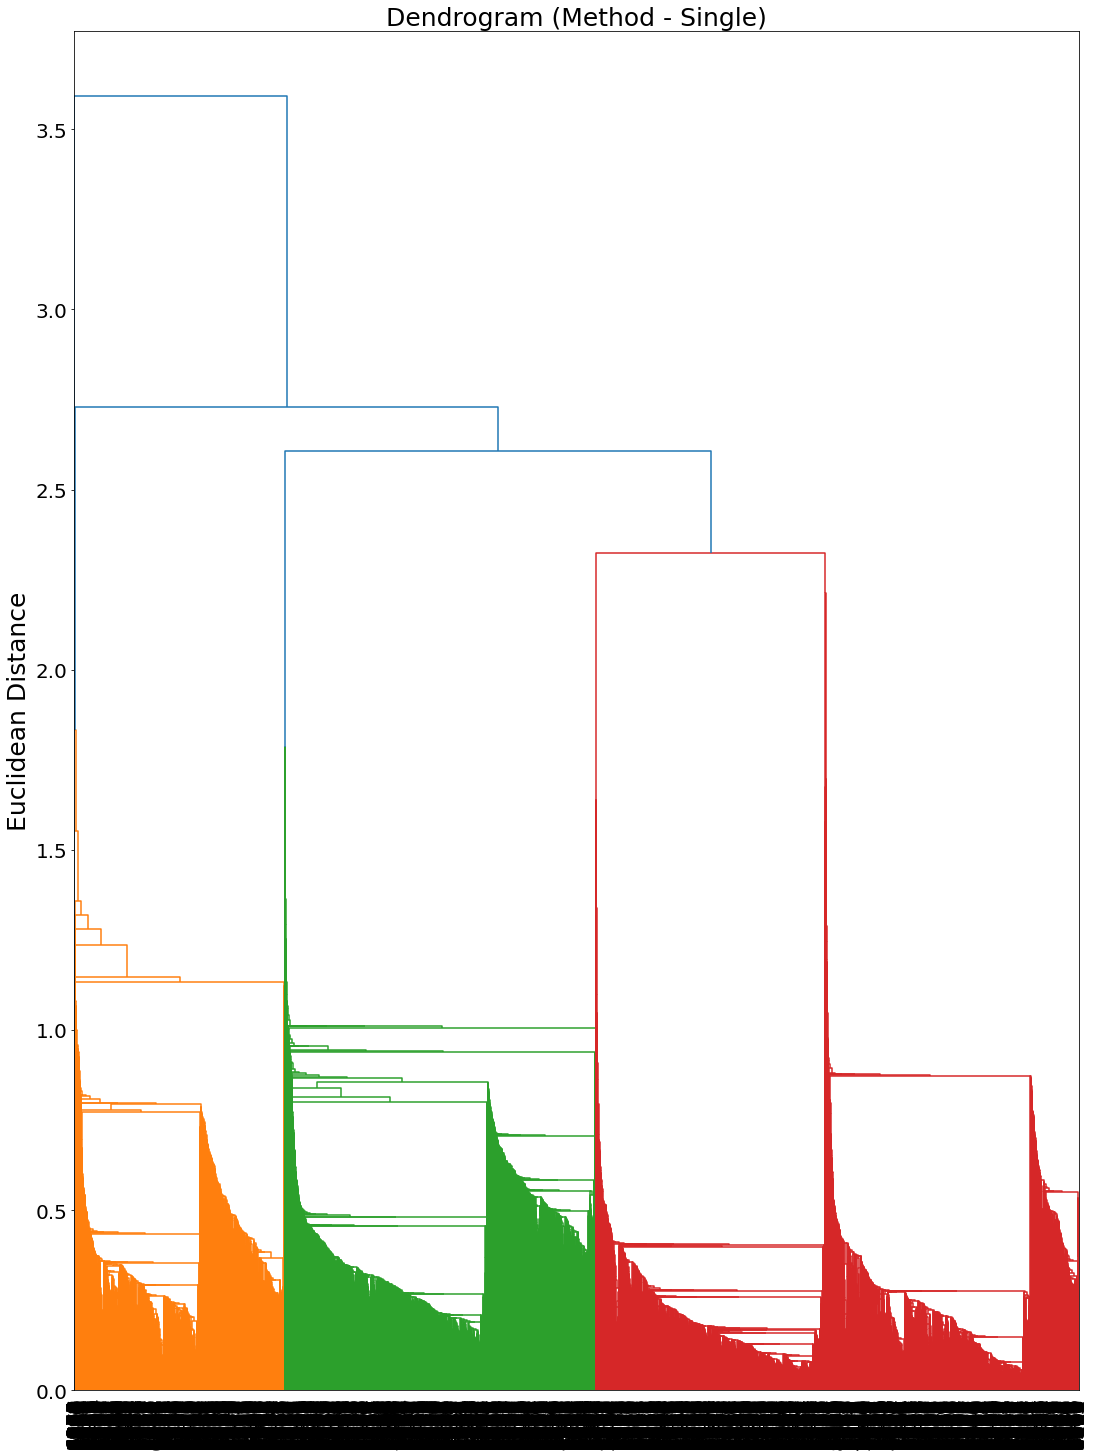

<Figure size 432x288 with 0 Axes>

In [120]:
plt.figure(figsize=(18,25))
den = sch.dendrogram(sch.linkage(final_data, method='single'))
plt.ylabel('Euclidean Distance', fontsize = 25)
plt.title('Dendrogram (Method - Single)',size=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
plt.savefig('dendogram_single.jpg')

**Complete Linkage**

The distance between two clusters is the longest distance between two points in each cluster.

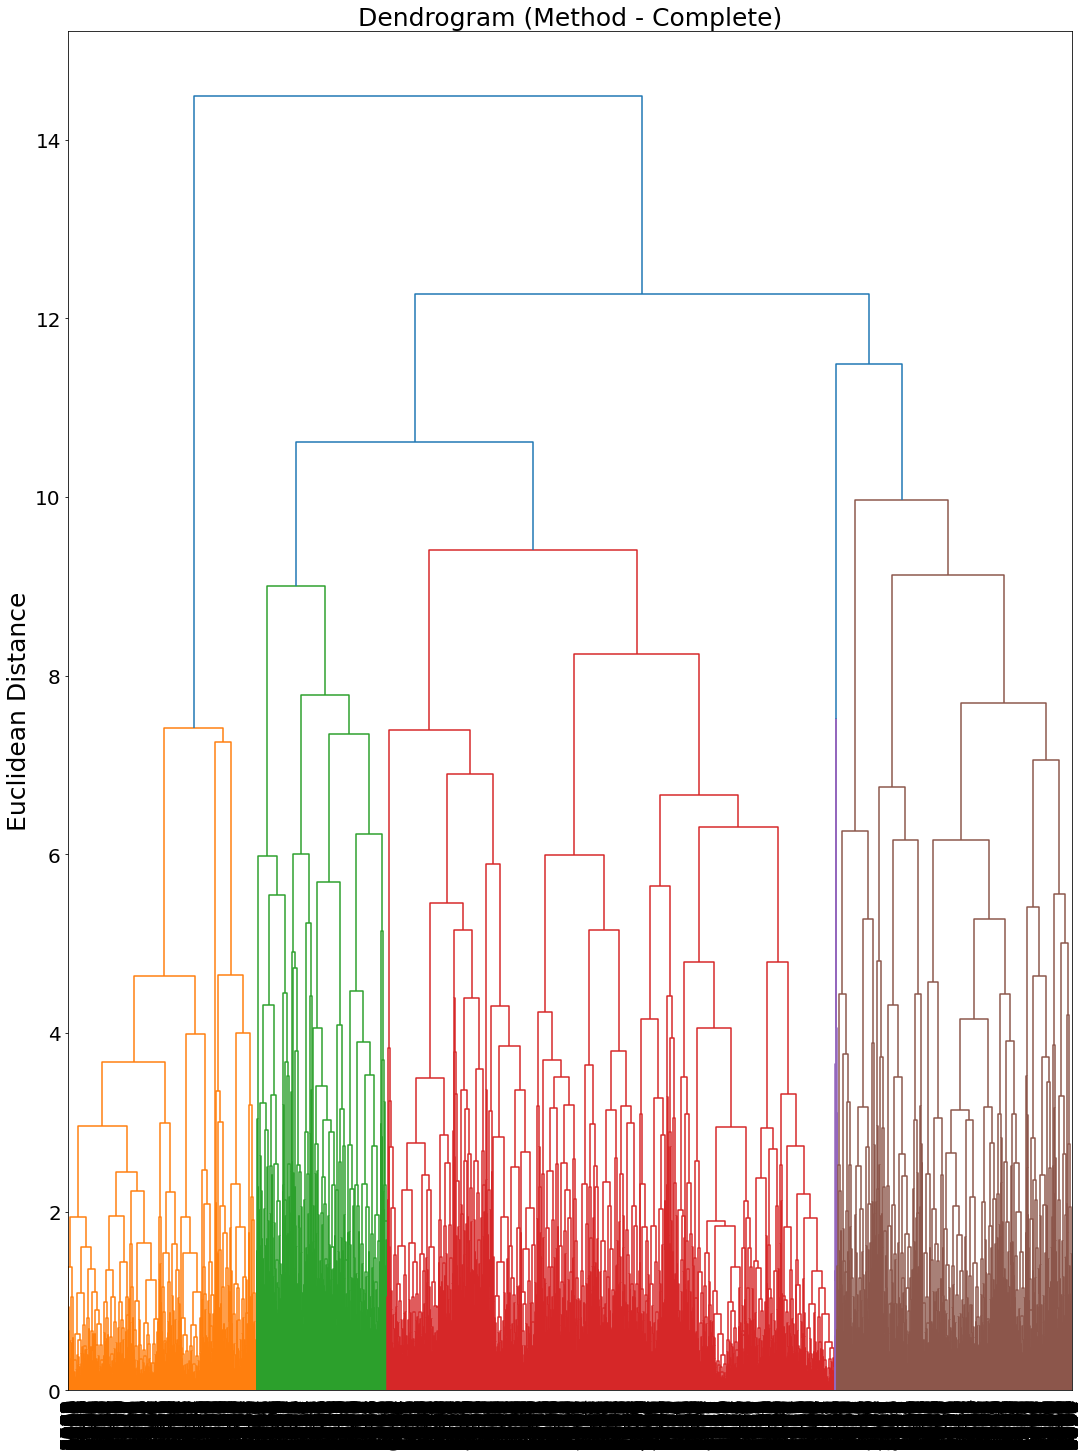

<Figure size 432x288 with 0 Axes>

In [121]:
plt.figure(figsize=(18,25))
den = sch.dendrogram(sch.linkage(final_data, method='complete'))
plt.ylabel('Euclidean Distance', fontsize = 25)
plt.title('Dendrogram (Method - Complete)',size=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
plt.savefig('dendogram_complete.jpg')

**Average Linkage**

The distance between clusters is the average distance between each point in one cluster to every point in the other cluster

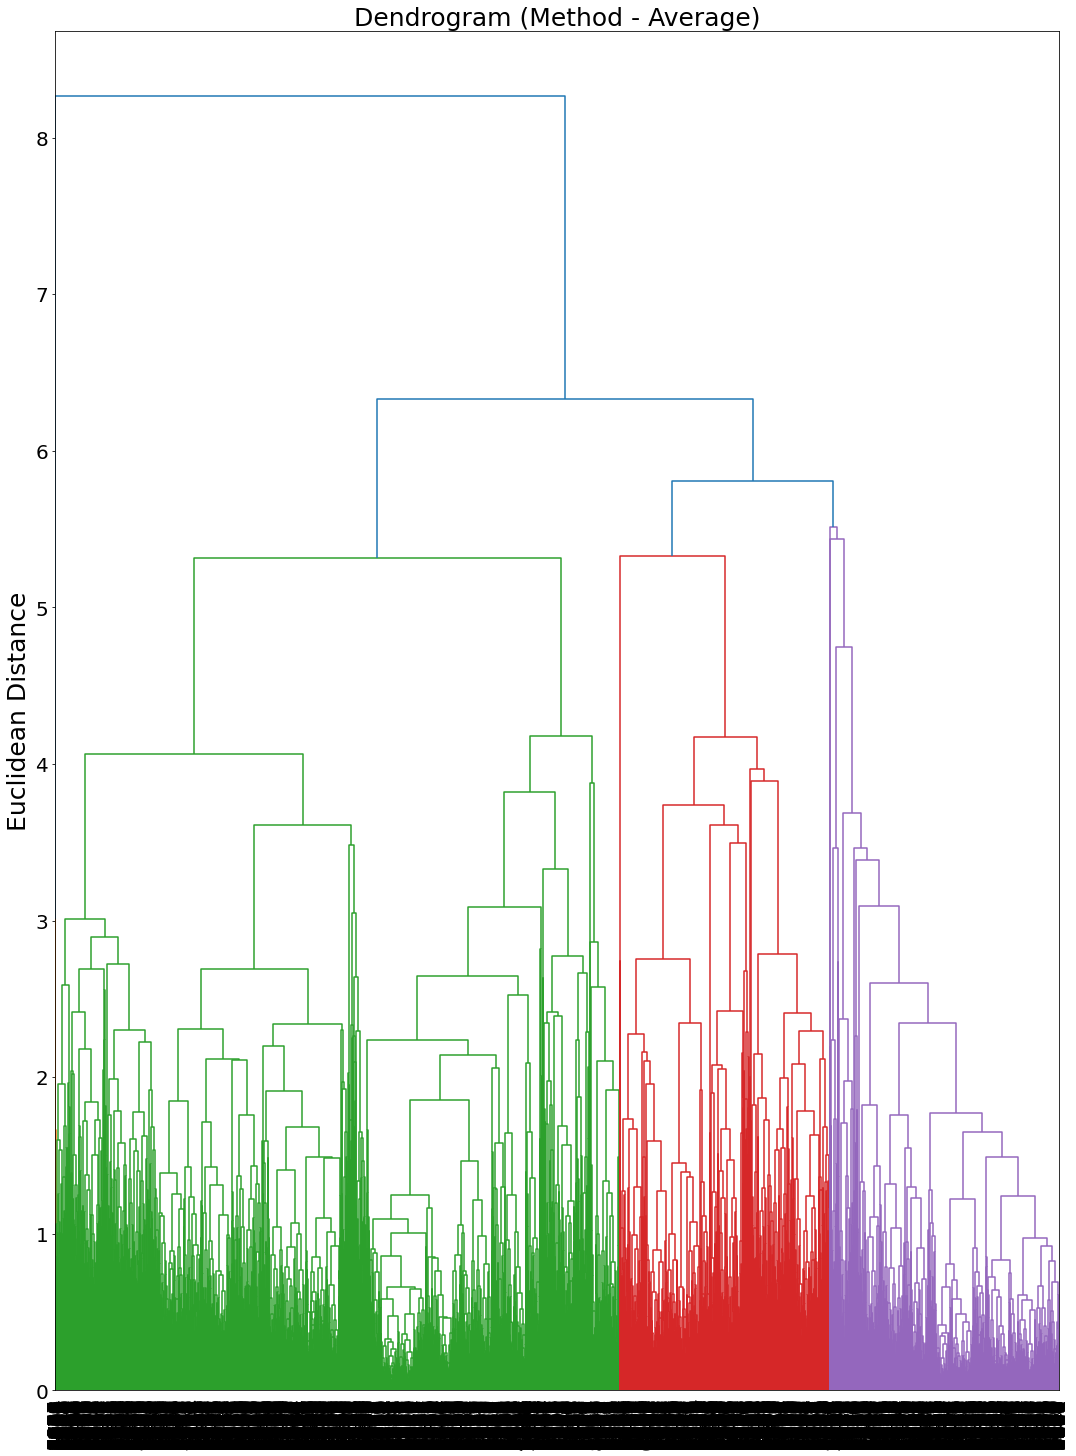

<Figure size 432x288 with 0 Axes>

In [122]:
plt.figure(figsize=(18,25))
den = sch.dendrogram(sch.linkage(final_data, method='average'))
plt.ylabel('Euclidean Distance', fontsize = 25)
plt.title('Dendrogram (Method - Average)',size=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
plt.savefig('dendogram_average.jpg')

**Ward Linkage**

The distance between clusters is the sum of the squared differences within all clusters

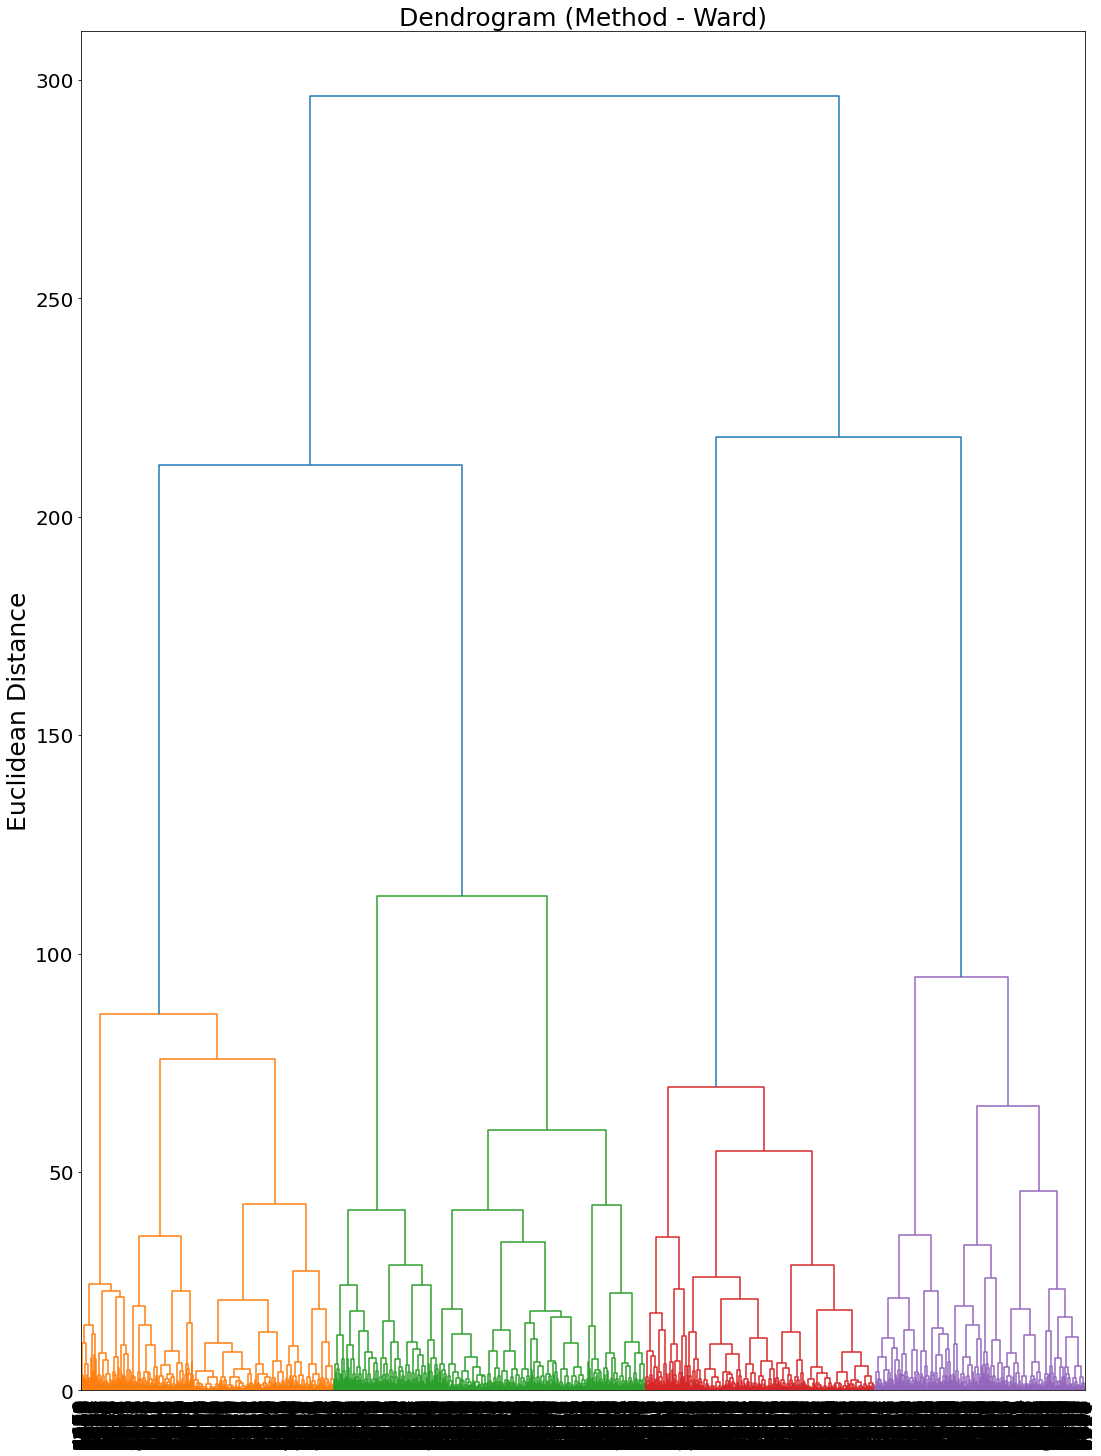

<Figure size 432x288 with 0 Axes>

In [123]:
plt.figure(figsize=(18,25))
den = sch.dendrogram(sch.linkage(final_data, method='ward'))
plt.ylabel('Euclidean Distance', fontsize = 25)
plt.title('Dendrogram (Method - Ward)',size=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
plt.savefig('dendogram_ward.jpg')

From the above dendograms, the linkage criteria that produces the best result is the Ward Linkage. When we draw a horizontal line at euclidean distance 200.0, it will pass through four vertical lines which indicates that the optimal number of clusters is 4.

## Agglomerative Clustering - Clustering Proper

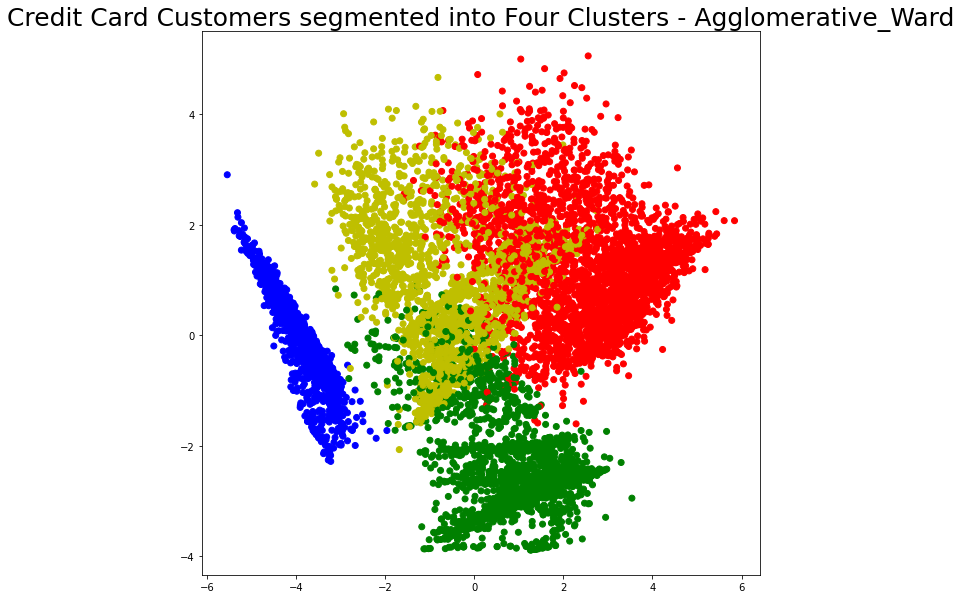

In [66]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model = model.fit(final_data)
labels = model.labels_

map_col = {0:'r', 1:'y',2:'b',3:'g'}
color_label = [map_col[l] for l in labels]
plt.figure(figsize=(10,10))
plt.scatter(final_data[:,0], final_data[:,1], c=color_label, )
plt.title('Credit Card Customers segmented into Four Clusters - Agglomerative_Ward', size=25)
plt.savefig('clustering_agglomerative_ward.jpg')

In [67]:
## Here we add the cluster labels to the dataset, cc_data_dummy
df_cluster_agglo = pd.concat([cc_data_dummy[kpi_cols], pd.Series(labels,name="Cluster")],axis=1 )

In [68]:
## Using the groupby(), we group the dataset by Cluster on the mean of all the columns.
## This way, we are able to view the mean of each column per cluster.
cluster_mean_agglo = df_cluster_agglo.groupby('Cluster').apply(lambda x: x[kpi_cols].mean())

In [69]:
cluster_mean_agglo

,Monthly_avg_purchase,Monthly_avg_cash_advance,Limit_Usage,Pay_minPay,None,both_oneOff_installment,installment,oneOff_purchases
Cluster,,,,,,,,
0,4.765783,1.641679,0.277122,1.630671,0.0,1.0,0.0,0.0
1,3.465881,1.914902,0.291879,1.315655,0.0,0.0,0.0,1.0
2,0.000000,4.469965,0.427389,1.136848,1.0,0.0,0.0,0.0
3,3.358409,0.928018,0.204192,1.242311,0.0,0.0,1.0,0.0


In [70]:
monthly_avg_purchase = cluster_mean_agglo.loc[:,'Monthly_avg_purchase'].values
monthly_cash_advance = cluster_mean_agglo.loc[:,'Monthly_avg_cash_advance'].values
credit_score = cluster_mean_agglo.loc[:,'Limit_Usage'].values
payment = cluster_mean_agglo.loc[:,'Pay_minPay'].values
none_of_install_oneOff_purchases = cluster_mean_agglo.loc[:,'None'].values
both_oneOff_installment = cluster_mean_agglo.loc[:,'both_oneOff_installment'].values
installment = cluster_mean_agglo.loc[:,'installment'].values
oneOff_purchases = cluster_mean_agglo.loc[:,'oneOff_purchases'].values
melt_df = melt_dataframe(cluster_mean_agglo)

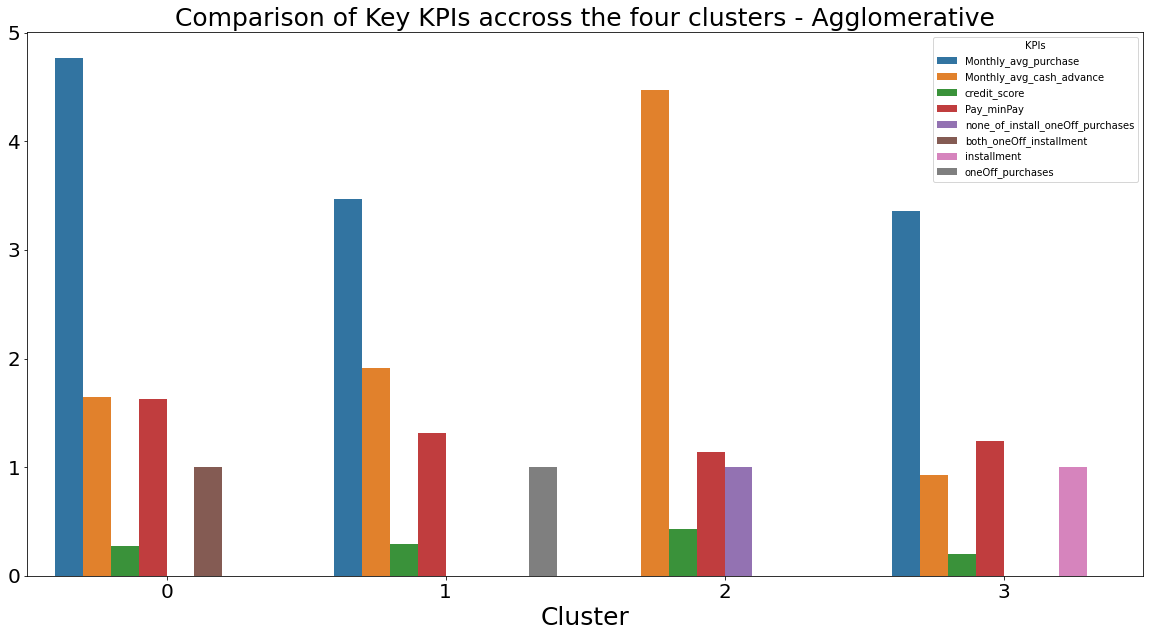

In [71]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='Cluster', y='KPI_values', hue='KPIs', data=melt_df, ax=ax)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Comparison of Key KPIs accross the four clusters - Agglomerative', size=25)
plt.ylabel('')
plt.xlabel('Cluster', size=25)
plt.savefig('kpi_clusters_agglo.jpg')

# Spectral Clustering

Spectral clustering is another popular clustering algorithm which perform very well in various scenarios. It assumes each point is a graph node and thus treats the clustering problem as a graph-partinioning problem.

In [124]:
from sklearn.cluster import SpectralClustering

cal_score = {}
sil_score = {}
for i in range(2,8):
    spec = SpectralClustering(n_clusters=i, affinity="rbf", n_init=200)
    spec = spec.fit(final_data)
    cal_score[i] = calinski_harabasz_score(final_data, spec.labels_)
    sil_score[i] = silhouette_score(final_data, spec.labels_)
    




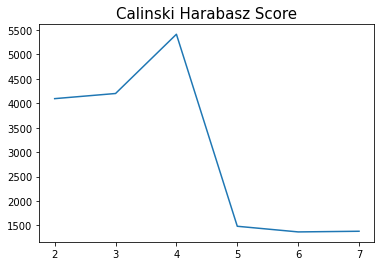

In [125]:
pd.Series(cal_score).plot()
# The plot below shows that Spectral Clustering with 4 clusters is able to show unique 
# characteristics of each cluster
plt.title('Calinski Harabasz Score',size=15)
plt.savefig('calinski_harabasz_score_spec.jpg')

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "size" which is no longer supported as of 3.3 and will become an error two minor releases later
  """


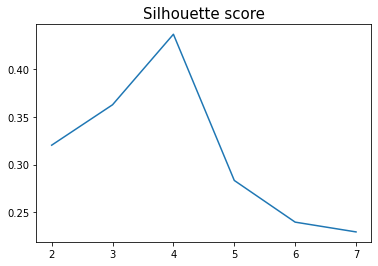

In [126]:
# The plot below also shows that Spectral Clustering with 4 clusters is able to show unique 
# characteristics of each cluster
pd.Series(sil_score).plot()
plt.title('Silhouette score',size=15)
plt.savefig('silhouette_score_spec.jpg', size=15)

In [75]:
spec = SpectralClustering(n_clusters=4, affinity="rbf", n_init=200)
spec = spec.fit(final_data)
spec_labels = spec.labels_

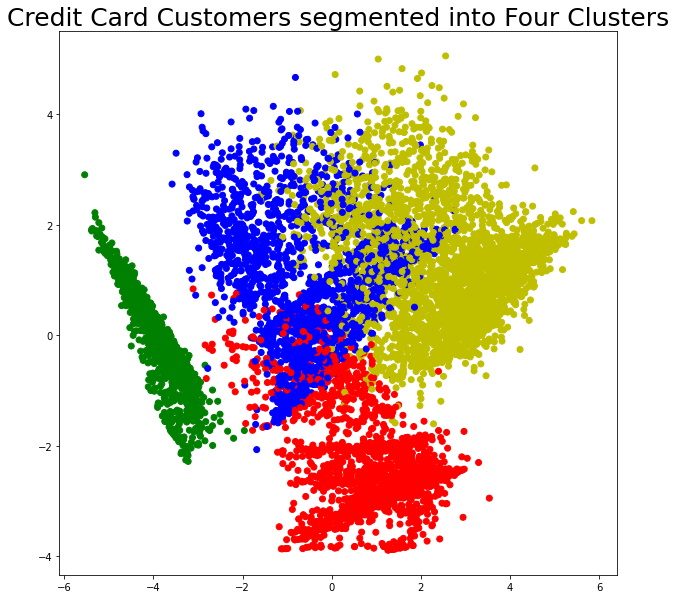

In [76]:
map_cols = {0:'r', 1:'y',2:'b',3:'g'}
color_label = [map_cols[l] for l in spec_labels]
plt.figure(figsize=(10,10))
plt.scatter(final_data[:,0], final_data[:,1], c=color_label, )
plt.title('Credit Card Customers segmented into Four Clusters', size=25)
plt.savefig('clustering_spectral.jpg')

In [77]:
## Here we add the cluster labels to the dataset, cc_data_dummy
df_cluster_spec = pd.concat([cc_data_dummy[kpi_cols], pd.Series(spec_labels,name="Cluster")],axis=1 )

In [78]:
## Using the groupby(), we group the dataset by Cluster on the mean of all the columns.
## This way, we are able to view the mean of each column per cluster.
cluster_mean_spec = df_cluster_spec.groupby('Cluster').apply(lambda x: x[kpi_cols].mean())

In [79]:
cluster_mean_spec

,Monthly_avg_purchase,Monthly_avg_cash_advance,Limit_Usage,Pay_minPay,None,both_oneOff_installment,installment,oneOff_purchases
Cluster,,,,,,,,
0,3.358409,0.928018,0.204192,1.242311,0.0,0.0,1.0,0.0
1,4.765783,1.641679,0.277122,1.630671,0.0,1.0,0.0,0.0
2,3.465881,1.914902,0.291879,1.315655,0.0,0.0,0.0,1.0
3,0.000000,4.469965,0.427389,1.136848,1.0,0.0,0.0,0.0


**From here, we will do the following:**
 - we will take all the KPIs and its values and merge them into a dataframe
 - we will melt the dataset using the melt() function to make it appropriate for visualization
 - From there, we will go on to visualize these KPIs, across all the four clusters.

In [80]:
monthly_avg_purchase = cluster_mean_spec.loc[:,'Monthly_avg_purchase'].values
monthly_cash_advance = cluster_mean_spec.loc[:,'Monthly_avg_cash_advance'].values
credit_score = cluster_mean_spec.loc[:,'Limit_Usage'].values
payment = cluster_mean_spec.loc[:,'Pay_minPay'].values
none_of_install_oneOff_purchases = cluster_mean_spec.loc[:,'None'].values
both_oneOff_installment = cluster_mean_spec.loc[:,'both_oneOff_installment'].values
installment = cluster_mean_spec.loc[:,'installment'].values
oneOff_purchases = cluster_mean_spec.loc[:,'oneOff_purchases'].values
melt_df = melt_dataframe(cluster_mean_spec)

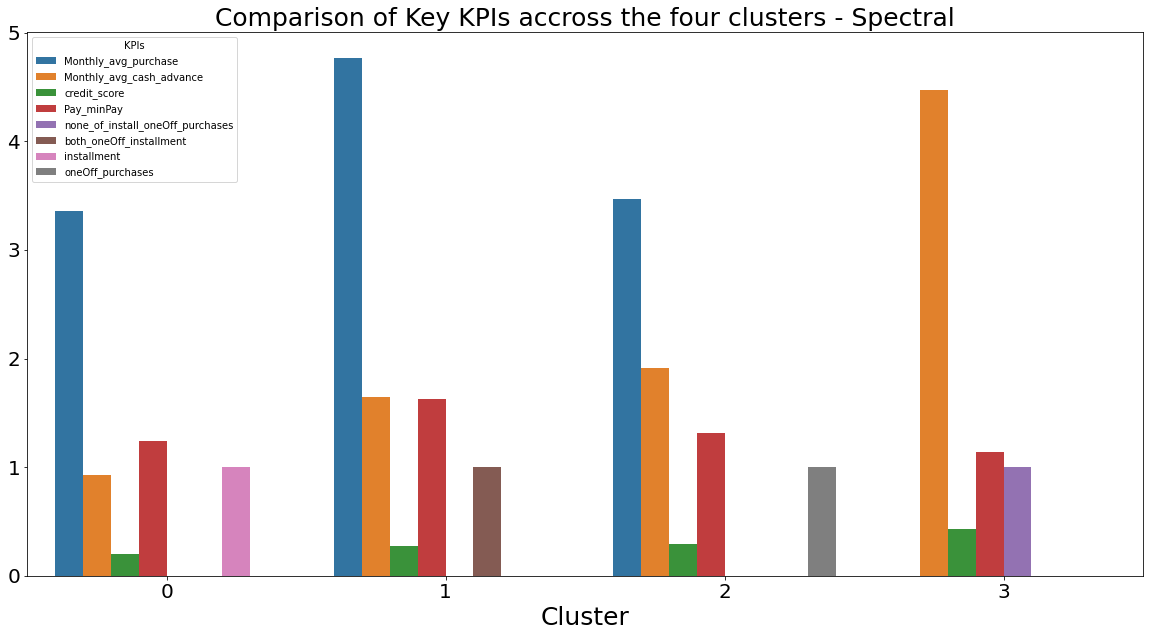

In [81]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='Cluster', y='KPI_values', hue='KPIs', data=melt_df, ax=ax)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Comparison of Key KPIs accross the four clusters - Spectral', size=25)
plt.ylabel('')
plt.xlabel('Cluster', size=25)
plt.savefig('kpi_clusters_spec.jpg')